<a href="https://colab.research.google.com/github/Nadiana-Kelly/Analise_Desempenho_SC_TF/blob/main/TF_ADS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importações

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)
from statsmodels.stats.contingency_tables import mcnemar

### Análise Exploratória dos Dados

In [ ]:
import pandas as pd
import numpy as np

column_names = [
    'ID', 'Diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se',
    'concave points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

df = pd.read_csv('wdbc.data', names=column_names)

print("Primeiras 5 linhas do DataFrame:")
print(df.head())
print("\nInformações do DataFrame:")
print(df.info())
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

Primeiras 5 linhas do DataFrame:
         ID Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture

### Pré-processamento do Conjunto de Dados

In [ ]:
df = df.drop('ID', axis=1)

df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

print("\nDistribuição da variável alvo 'Diagnosis' após codificação:")
print(df['Diagnosis'].value_counts())
print(df['Diagnosis'].value_counts(normalize=True))

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

print("\nFormato de X (Features):", X.shape)
print("Formato de y (Variável Alvo):", y.shape)
print("\nPrimeiras linhas de X:")
print(X.head())
print("\nPrimeiras linhas de y:")
print(y.head())


Distribuição da variável alvo 'Diagnosis' após codificação:
Diagnosis
0    357
1    212
Name: count, dtype: int64
Diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

Formato de X (Features): (569, 30)
Formato de y (Variável Alvo): (569,)

Primeiras linhas de X:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974

### Divisão do Dataset: Treinamento e Teste

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("\nFormato de X_train (Features de Treino):", X_train.shape)
print("Formato de X_test (Features de Teste):", X_test.shape)
print("Formato de y_train (Alvo de Treino):", y_train.shape)
print("Formato de y_test (Alvo de Teste):", y_test.shape)

print("\nDistribuição de y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição de y_test:")
print(y_test.value_counts(normalize=True))

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("\nPrimeiras 5 linhas de X_train_scaled (após padronização):")
print(X_train_scaled[:5])
print("\nPrimeiras 5 linhas de X_test_scaled (após padronização):")
print(X_test_scaled[:5])


Formato de X_train (Features de Treino): (455, 30)
Formato de X_test (Features de Teste): (114, 30)
Formato de y_train (Alvo de Treino): (455,)
Formato de y_test (Alvo de Teste): (114,)

Distribuição de y_train:
Diagnosis
0    0.626374
1    0.373626
Name: proportion, dtype: float64

Distribuição de y_test:
Diagnosis
0    0.631579
1    0.368421
Name: proportion, dtype: float64

Primeiras 5 linhas de X_train_scaled (após padronização):
[[ 5.18558727e-01  8.91825791e-01  4.24631702e-01  3.83925436e-01
  -9.74743706e-01 -6.89771505e-01 -6.88586446e-01 -3.98175254e-01
  -1.03915470e+00 -8.25056321e-01 -1.09317755e-01 -5.59755400e-02
  -2.10096206e-01 -1.59132582e-02 -1.00518399e+00 -9.11941990e-01
  -6.62815884e-01 -6.52561081e-01 -7.01889114e-01 -2.75393571e-01
   5.79797697e-01  1.31324246e+00  4.66908134e-01  4.45982711e-01
  -5.96154777e-01 -6.34722227e-01 -6.10227299e-01 -2.35743918e-01
   5.45663235e-02  2.18367276e-02]
 [-5.16364088e-01 -1.63971029e+00 -5.41348716e-01 -5.42961327e-0

### Treinamento e Avaliação dos Modelos

--- Pré-processamento Concluído. Iniciando Treinamento e Avaliação ---

--- Otimizando Modelos com GridSearchCV ---

### Otimizando: Regressão Logística ###
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores hiperparâmetros para Regressão Logística: {'C': 100, 'solver': 'liblinear'}
Melhor pontuação de Recall (CV) para Regressão Logística: 0.9529

### Modelo: Regressão Logística ###
Relatório de Classificação (Regressão Logística):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Matriz de Confusão (Regressão Logística):
 [[71  1]
 [ 5 37]]


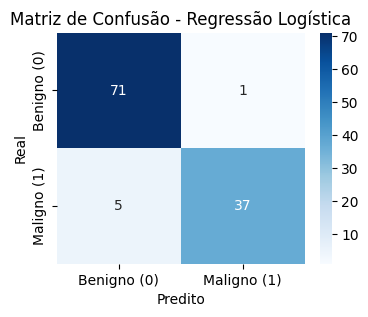

AUC (Regressão Logística): 0.9769


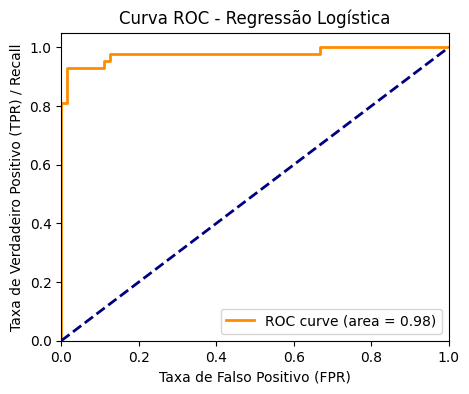


### Otimizando: Random Forest Classifier ###
Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)

from statsmodels.stats.contingency_tables import mcnemar

column_names = [
    'ID', 'Diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se',
    'concave points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
df = pd.read_csv('wdbc.data', names=column_names)

df = df.drop('ID', axis=1)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("--- Pré-processamento Concluído. Iniciando Treinamento e Avaliação ---")

all_model_aucs = {}

all_model_predictions = {}

def evaluate_and_plot_model(model_name, model, y_pred_data, X_test_data, y_test_data, all_aucs_dict, all_preds_dict):
    """Avalia e plota os resultados de um modelo."""
    print(f"\n### Modelo: {model_name} ###")

    y_pred = y_pred_data

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_data)[:, 1]
    else:
        y_prob = model.decision_function(X_test_data)

    print(f"Relatório de Classificação ({model_name}):")
    print(classification_report(y_test_data, y_pred))

    cm = confusion_matrix(y_test_data, y_pred)
    print(f"Matriz de Confusão ({model_name}):\n", cm)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Benigno (0)', 'Maligno (1)'],
                yticklabels=['Benigno (0)', 'Maligno (1)'])
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.ylabel('Real')
    plt.xlabel('Predito')
    plt.show()

    if hasattr(model, "predict_proba") or hasattr(model, "decision_function"):
        fpr, tpr, _ = roc_curve(y_test_data, y_prob)
        auc_score = auc(fpr, tpr)
        all_aucs_dict[model_name] = auc_score
        all_preds_dict[model_name] = y_pred_data
        print(f"AUC ({model_name}): {auc_score:.4f}")

        plt.figure(figsize=(5, 4))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Taxa de Falso Positivo (FPR)')
        plt.ylabel('Taxa de Verdadeiro Positivo (TPR) / Recall')
        plt.title(f'Curva ROC - {model_name}')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print(f"Nota: {model_name} não suporta predict_proba ou decision_function para Curva ROC/AUC.")


#Regressão Logística (com GridSearchCV)
print("\n--- Otimizando Modelos com GridSearchCV ---")
print("\n### Otimizando: Regressão Logística ###")

param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid_search_log_reg = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000),
                                   param_grid_log_reg,
                                   cv=5,
                                   scoring='recall',
                                   n_jobs=-1,
                                   verbose=1)

grid_search_log_reg.fit(X_train_scaled, y_train)

print(f"Melhores hiperparâmetros para Regressão Logística: {grid_search_log_reg.best_params_}")
print(f"Melhor pontuação de Recall (CV) para Regressão Logística: {grid_search_log_reg.best_score_:.4f}")

best_log_reg_model = grid_search_log_reg.best_estimator_
y_pred_log_reg = best_log_reg_model.predict(X_test_scaled)
evaluate_and_plot_model("Regressão Logística", best_log_reg_model, y_pred_log_reg, X_test_scaled, y_test, all_model_aucs, all_model_predictions)

#Random Forest Classifier (com GridSearchCV)
print("\n### Otimizando: Random Forest Classifier ###")

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_rf, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train_scaled, y_train)

print(f"Melhores hiperparâmetros para Random Forest: {grid_search_rf.best_params_}")
print(f"Melhor pontuação de Recall (CV) para Random Forest: {grid_search_rf.best_score_:.4f}")

best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)
evaluate_and_plot_model("Random Forest", best_rf_model, y_pred_rf, X_test_scaled, y_test, all_model_aucs, all_model_predictions)


#Support Vector Machine (SVM) - com GridSearchCV
print("\n### Otimizando: Support Vector Machine (SVM) ###")

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(SVC(random_state=42, probability=True),
                               param_grid_svm, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_search_svm.fit(X_train_scaled, y_train)

print(f"Melhores hiperparâmetros para SVM: {grid_search_svm.best_params_}")
print(f"Melhor pontuação de Recall (CV) para SVM: {grid_search_svm.best_score_:.4f}")

best_svm_model = grid_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test_scaled)
evaluate_and_plot_model("SVM", best_svm_model, y_pred_svm, X_test_scaled, y_test, all_model_aucs, all_model_predictions)

#K-Nearest Neighbors (KNN) - com GridSearchCV
print("\n### Otimizando: K-Nearest Neighbors (KNN) ###")

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(),
                               param_grid_knn, cv=5, scoring='recall', n_jobs=-1, verbose=1)

grid_search_knn.fit(X_train_scaled, y_train)

print(f"Melhores hiperparâmetros para KNN: {grid_search_knn.best_params_}")
print(f"Melhor pontuação de Recall (CV) para KNN: {grid_search_knn.best_score_:.4f}")

best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test_scaled)
evaluate_and_plot_model("KNN", best_knn_model, y_pred_knn, X_test_scaled, y_test, all_model_aucs, all_model_predictions)

print("\n--- SUMÁRIO FINAL DE AUCs DOS MODELOS OTIMIZADOS ---")
sorted_aucs = sorted(all_model_aucs.items(), key=lambda item: item[1], reverse=True)
for model_name, auc_score in sorted_aucs:
    print(f"AUC {model_name.ljust(20)}: {auc_score:.4f}")


print("\n\n--- Testes de Hipótese: Comparação Estatística dos Modelos ---")

alpha = 0.05
print(f"\nNível de Significância (alpha): {alpha}")

models_to_compare = list(all_model_predictions.keys())

def perform_mcnemar_test(model1_name, y_pred1, model2_name, y_pred2, y_true, alpha):
    """Realiza o Teste de McNemar e imprime os resultados."""
    print(f"\n--- Comparando: {model1_name} vs. {model2_name} ---")

    n01 = np.sum((y_pred1 == y_true) & (y_pred2 != y_true))

    n10 = np.sum((y_pred1 != y_true) & (y_pred2 == y_true))

    print(f"  {model1_name} acertou e {model2_name} errou (n01): {n01} casos")
    print(f"  {model1_name} errou e {model2_name} acertou (n10): {n10} casos")

    n_00 = np.sum((y_pred1 == y_true) & (y_pred2 == y_true))
    n_11 = np.sum((y_pred1 != y_true) & (y_pred2 != y_true))

    table = np.array([[n_00, n01],
                      [n10, n_11]])

    print("  Tabela de Contingência (para o teste de McNemar):")
    print(table)

    if (n01 + n10) < 25:
        result = mcnemar(table, exact=True)
    else:
        result = mcnemar(table, exact=False, correction=True)

    print(f"  p-value: {result.pvalue:.4f}")

    if result.pvalue < alpha:
        print(f"  Conclusão: Rejeitamos a Hipótese Nula. Há uma diferença estatisticamente significativa entre {model1_name} e {model2_name} (p-value < {alpha}).")
        if n01 < n10:
            print(f"  (Implica que {model1_name} é estatisticamente superior a {model2_name} nos casos discordantes).")
        else:
            print(f"  (Implica que {model2_name} é estatisticamente superior a {model1_name} nos casos discordantes).")
    else:
        print(f"  Conclusão: Não rejeitamos a Hipótese Nula. Não há uma diferença estatisticamente significativa entre {model1_name} e {model2_name} (p-value >= {alpha}).")
        print(f"  (As diferenças observadas podem ser devido ao acaso ou variabilidade da amostra).")

models_to_compare = list(all_model_predictions.keys())

for i in range(len(models_to_compare)):
    for j in range(i + 1, len(models_to_compare)):
        model1_name = models_to_compare[i]
        model2_name = models_to_compare[j]
        y_pred1 = all_model_predictions[model1_name]
        y_pred2 = all_model_predictions[model2_name]

        perform_mcnemar_test(model1_name, y_pred1, model2_name, y_pred2, y_test, alpha)